# Part I - Loan Approval
## by Peter

## Introduction

This datasets consist of different features used by the loaner to determine who gets approved for the applied the loan and who doesnot.  collected nvestigation of creteria to be given a loan.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#loading original datasets
loan_df=pd.read_csv("prosperLoanData.csv")
loan_df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [3]:
#making copy of the data 
loan_data=loan_df.copy()
loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
#Converting True and False values and Floats into int
loan_data['IsBorrowerHomeowner']=loan_data['IsBorrowerHomeowner'].astype(int)
loan_data['StatedMonthlyIncome']=loan_data['StatedMonthlyIncome'].astype(int)


In [5]:
loan_data.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

### Main structure of the dataset?

Dataset used in this project is a combination of numeric and categorical values

### Main feature(s) of interest in the stated dataset
<p>What are the contributing factors to loan approval? </p>
<p>What is the average number of months each individual has to pay back the loan? </p>
<p>Which individuals are likely to receive a high amount of loan?</p>
<p>How long does it takes for an  individual to pay back the borrowed money </p>

### Features that supported the investigation of feature of interest
<p>Employmentstatus, Occupation,Employment status duration, IsBorrowerHomeOwner, BorrowerState, IncomeRange,StatedMonthlyIncome,
    Loan Status </p>

## Univariate Exploration
In this section, I was investigating the distributions of individuals variables. I created visualisation in order to find answers to the posted questions.tions were extracted after the exploration 


Text(0.5, 1.0, 'Employment Status of Borrower vs Counts')

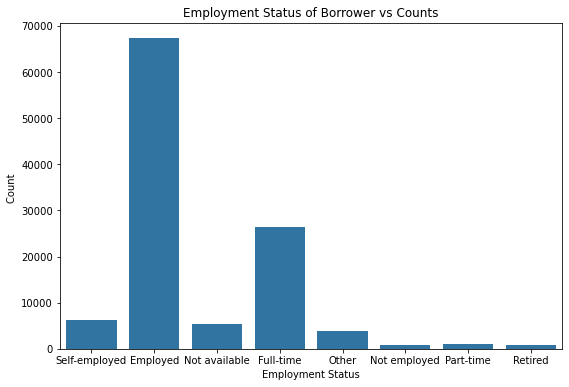

In [6]:
color_base=sb.color_palette()[0]
fig=plt.figure(figsize=(9,6))
sb.countplot(data=loan_data, x="EmploymentStatus",color=color_base)
plt.xlabel("Employment Status")
plt.ylabel("Count ")
plt.title("Employment Status of Borrower vs Counts")

<AxesSubplot:xlabel='count', ylabel='Occupation'>

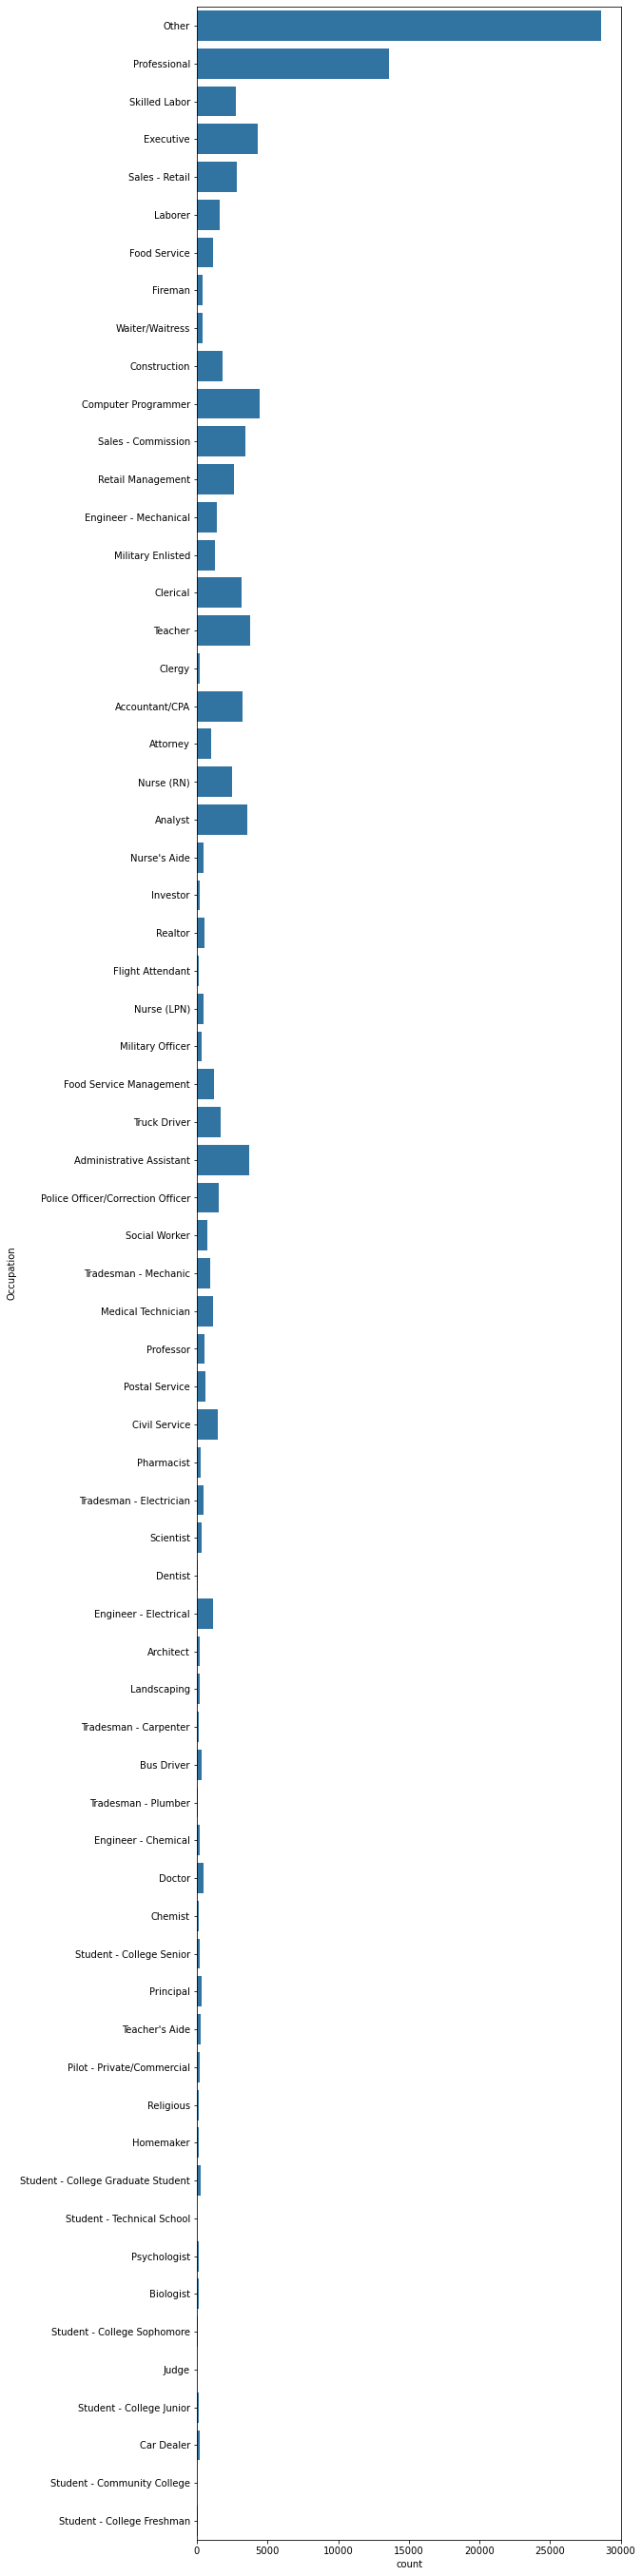

In [7]:
plt.figure(figsize=(8,49))
sb.countplot(data=loan_df,y="Occupation",color=color_base)

<AxesSubplot:xlabel='IsBorrowerHomeowner', ylabel='count'>

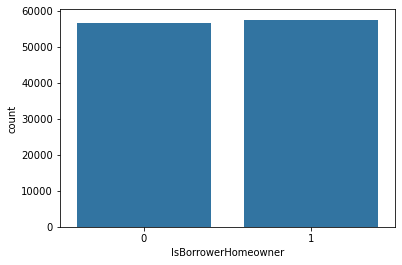

In [8]:
sb.countplot(data=loan_data,x='IsBorrowerHomeowner', color=color_base)

Text(0.5, 1.0, 'Loan Payment Term vs Count')

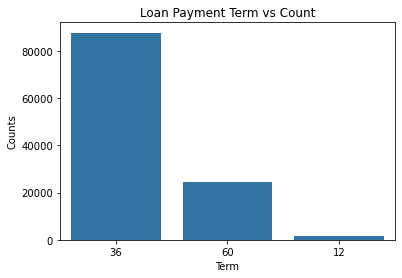

In [9]:
#loan_data.hist('StatedMonthlyIncome')
sb.countplot(data=loan_data,x="Term",color=color_base,order=[36,60,12])
plt.xlabel("Term")
plt.ylabel("Counts")
plt.title("Loan Payment Term vs Count")

In [10]:
loan_data.BorrowerState.value_counts()

CA    14717
TX     6842
NY     6729
FL     6720
IL     5921
GA     5008
OH     4197
MI     3593
VA     3278
NJ     3097
NC     3084
WA     3048
PA     2972
MD     2821
MO     2615
MN     2318
MA     2242
CO     2210
IN     2078
AZ     1901
WI     1842
OR     1817
TN     1737
AL     1679
CT     1627
SC     1122
NV     1090
KS     1062
KY      983
OK      971
LA      954
UT      877
AR      855
MS      787
NE      674
ID      599
NH      551
NM      472
RI      435
HI      409
WV      391
DC      382
MT      330
DE      300
VT      207
AK      200
SD      189
IA      186
WY      150
ME      101
ND       52
Name: BorrowerState, dtype: int64

Text(0.5, 1.0, 'Borrrower vs Counts')

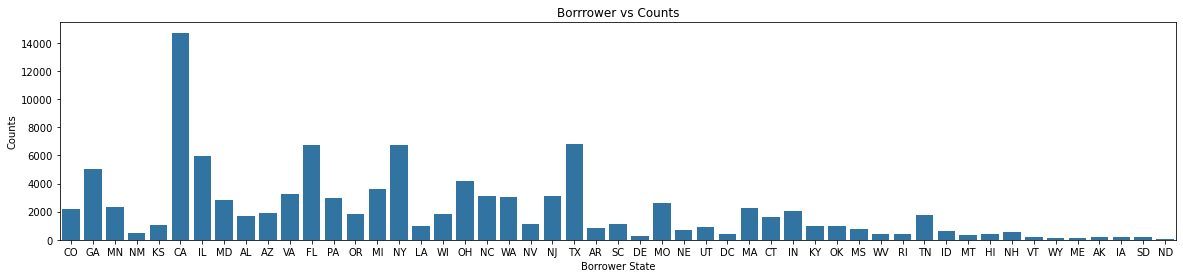

In [11]:
plt.figure(figsize=(20, 4))
sb.countplot(data=loan_data,x='BorrowerState', color=color_base)
plt.xlabel("Borrower State")
plt.ylabel("Counts")
plt.title("Borrrower vs Counts")

Text(0.5, 1.0, 'Income Range vs Counts')

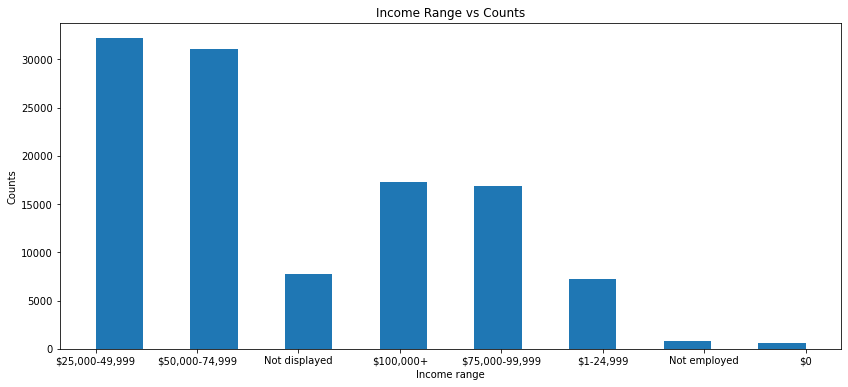

In [12]:
fig_size = plt.figure()
fig_size.set_figwidth(14)
fig_size.set_figheight(6)
plt.hist(data=loan_data,x="IncomeRange",bins=15)
plt.xlabel("Income range")
plt.ylabel("Counts")
plt.title("Income Range vs Counts")

In [13]:
#plt.figure(figsize=(12,6))
#sb.countplot(data=loan_data,x="IncomeRange",color=color_base)

In [14]:
loan_data.LoanOriginalAmount.value_counts()

4000     14333
15000    12407
10000    11106
5000      6990
2000      6067
         ...  
5284         1
7936         1
1201         1
10593        1
4292         1
Name: LoanOriginalAmount, Length: 2468, dtype: int64

(array([42754., 22132., 19503.,  6101., 13786.,  4575.,   747.,  3722.,
          137.,   480.]),
 array([ 1000.,  4400.,  7800., 11200., 14600., 18000., 21400., 24800.,
        28200., 31600., 35000.]),
 <BarContainer object of 10 artists>)

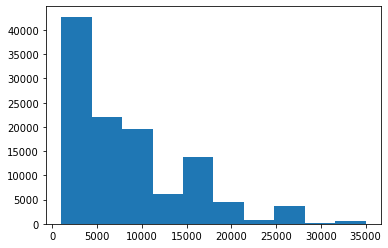

In [15]:
plt.hist(data=loan_data,x="LoanOriginalAmount")

### Observation from Univariable analysis
<p>I didnot remove the missing values because of its less impact to the analysis, however, I have converted the True or False values of IsBorrowerHomeOwner to to 0 and 1s for me to perfom exploratory analysis easier. </p>
<p>
I found that people from the state of California,Texas,Florida and New York had more chance of receiving the loan.</p>
<p>Also, the majority of borrowers opted to repay back the loan within 36 months. </p>
<p>
The decision to be given loan was not influenced by applicant having a house or homeowner.
</p>
<p>Overall, people with earning between 25k and 50K had more chances of receiving the loan.</p>
<p>Moreover, individual who are employed  and have full time jobs have more access to large amount of loan compared to the not 
employed and part_timers and pensioners. </p>


## Bivariate Exploration
Investigating relationship between pairs of variables in the data.

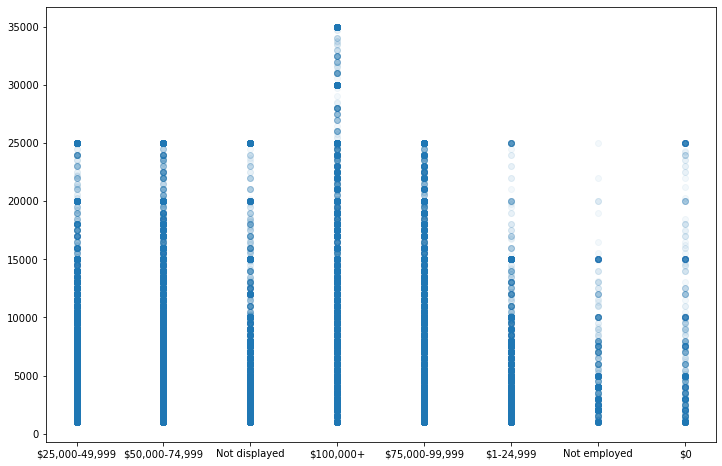

In [16]:
plt.figure(figsize=(12,8))
plt.scatter(data=loan_data,x="IncomeRange",y="LoanOriginalAmount",alpha=1/20)

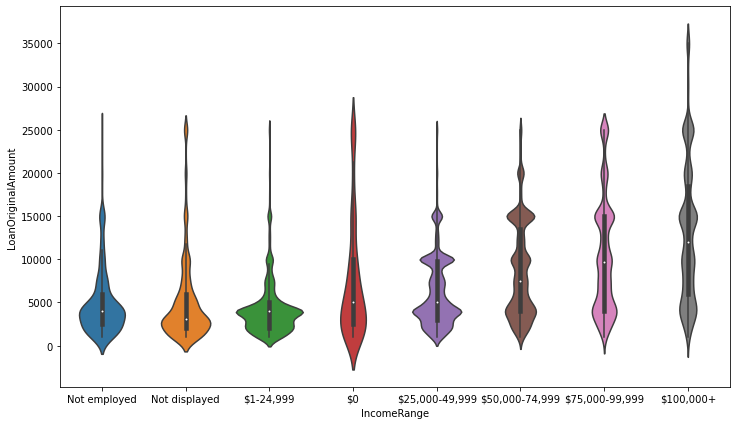

In [17]:
income_range = ['Not employed','Not displayed','$1-24,999','$0','$25,000-49,999', '$50,000-74,999', '$75,000-99,999','$100,000+']
earning_range = pd.api.types.CategoricalDtype(ordered=True, categories=income_range)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
loan_data['IncomeRange'] = loan_data['IncomeRange'].astype(earning_range);
plt.figure(figsize=(12,7))
sb.violinplot(data=loan_data, x='IncomeRange', y='LoanOriginalAmount');

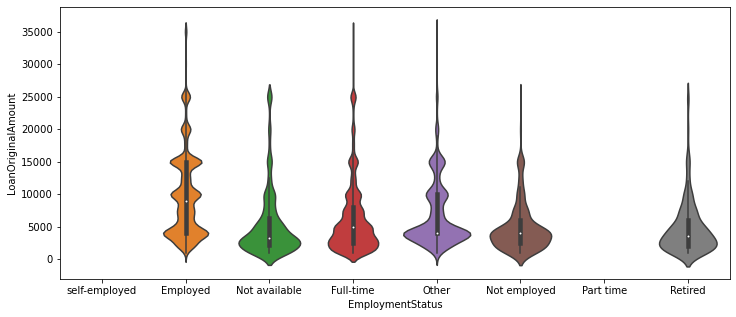

In [18]:
pay_back = ['self-employed','Employed','Not available','Full-time','Other','Not employed','Part time','Retired']
repay = pd.api.types.CategoricalDtype(ordered=True, categories=pay_back)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
loan_data['EmploymentStatus'] = loan_data['EmploymentStatus'].astype(repay);
plt.figure(figsize=(12,5))
sb.violinplot(data=loan_data, x='EmploymentStatus', y='LoanOriginalAmount');



### Relationships between feature of interest and other feature in the dataset

I didnot find a linear relationship between the Income range and amount the individual was or has to be given..


### Surprising interactions between features?
Many times asset like house is very associated but this datasets reveal that asset like hosue didnot influence the decision to give someone a loan.

## Conclusions
The analysis found every citizen in the USA have an access to the loan ,however the decision whether to be given a loan is impacted by the location of the borrower, earning, type of employment and has nothing to do with asset like house.
